# Pyber Ride Sharing

## Analysis
- More people use Pyber in urban settings than suburban or rural areas.
- Based on the chart, the average fare for cities in urban areas are less than those in suburban or rural areas.
- There are more drivers available in urban cities compared to suburban and rural.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read CSV files and create dataframes 
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")

#merge dataframes
combined_df = pd.merge(city_df, ride_df, how="outer", on="city")
combined_df = combined_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
#sort data by different "type" - locate type on file 
rural_data = combined_df.loc[combined_df["type"] == "Rural"]
suburban_data = combined_df.loc[combined_df["type"] == "Suburban"]
urban_data = combined_df.loc[combined_df["type"] == "Urban"]

#finding x, y, and size of RURAL data
rural_x = rural_data["ride_id"].groupby(rural_data["city"]).count()
#print(rural_x.head())
rural_y = rural_data["fare"].groupby(rural_data["city"]).mean()
#print(rural_y.head())
rural_size = rural_data["driver_count"].groupby(rural_data["city"]).mean()
#print(rural_size.head())

#finding x, y, and size of SUBURBAN data
suburban_x = suburban_data["ride_id"].groupby(suburban_data["city"]).count()
#print(suburban_x.head())
suburban_y = suburban_data["fare"].groupby(suburban_data["city"]).mean()
#print(suburban_y.head())
suburban_size = suburban_data["driver_count"].groupby(suburban_data["city"]).mean()
#print(suburban_size.head())

#finding x, y, and size of URBAN data
urban_x = urban_data["ride_id"].groupby(urban_data["city"]).count()
#print(urban_x.head())
urban_y = urban_data["fare"].groupby(urban_data["city"]).mean()
#print(urban_y.head())
urban_size = urban_data["driver_count"].groupby(urban_data["city"]).mean()
#print(urban_size.head())

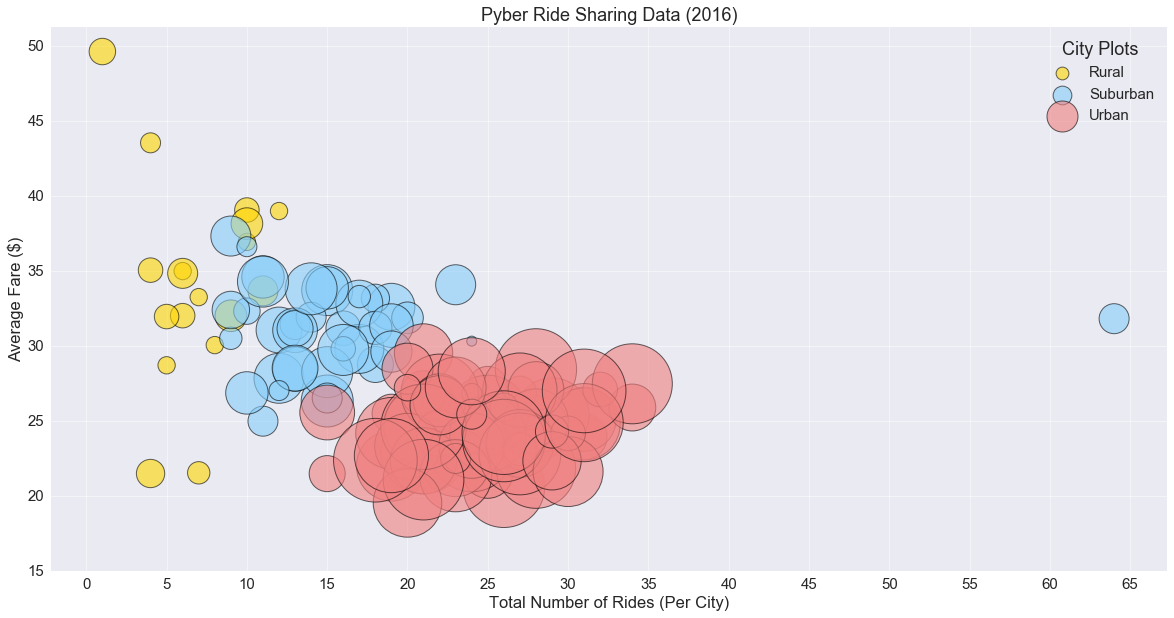

In [8]:
#create a scatter plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

#add rural, suburban, and urban data to plot
rural_chart = plt.scatter(rural_x, rural_y, s=rural_size*100, 
                          c="gold", edgecolor="black", alpha=0.6, linewidths=1)
suburban_chart = plt.scatter(suburban_x, suburban_y, s=suburban_size*100, 
                             c="lightskyblue", edgecolor="black", alpha=0.6, linewidths=1)
urban_chart = plt.scatter(urban_x, urban_y, s=urban_size*100, 
                          c="lightcoral", edgecolor="black", alpha=0.6, linewidths=1)
#title and axes labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 

#create ticks 
xticks = np.arange(0, 70, 5)
yticks = np.arange(15, 55, 5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

#charts aesthetics 
ax.grid(which="major", alpha=0.5)
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)
plt.legend((rural_chart, suburban_chart, urban_chart),
           ("Rural", "Suburban", "Urban"),
           title="City Plots", markerscale=0.5,
           loc="best")

plt.savefig("bubbleplot.png") #save image
plt.show()


## Total Fares by City Type

C:\Users\small\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


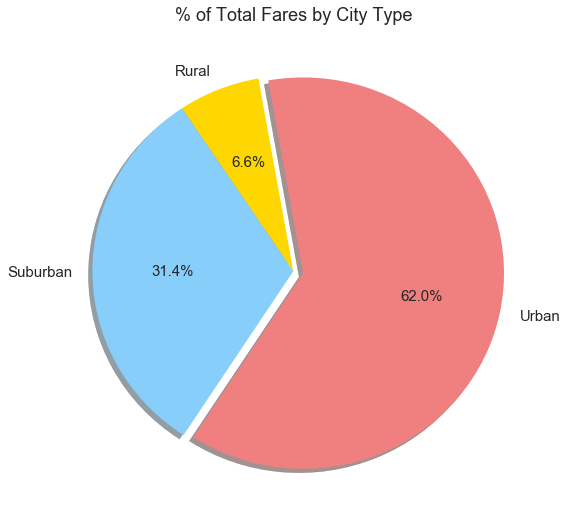

In [5]:
#fare by city type
city_type = combined_df.groupby("type")
fare_by_type = city_type["fare"].sum()

#create pie chart 
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.05]

fare_by_type_chart = fare_by_type.plot(kind="pie", colors=colors, 
                                       explode=explode, shadow=True, startangle=100,
                                       autopct="%1.1f%%", figsize=(9,9), fontsize=15,
                                       title="% of Total Fares by City Type")
plt.axes().set_ylabel(" ")

plt.savefig("total_fares.png")
plt.show()

## Total Rides by City Type

C:\Users\small\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


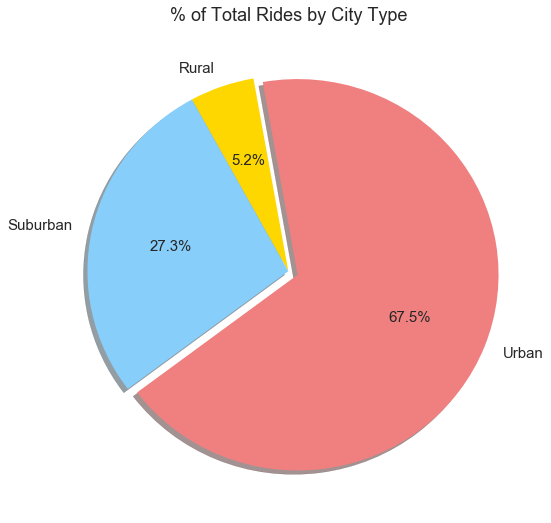

In [6]:
#total rides by city type
city_type = combined_df.groupby("type")
rides_by_type = city_type["ride_id"].count()

#create pie chart 
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.05]

rides_by_type_chart = rides_by_type.plot(kind="pie", colors=colors, 
                                       explode=explode, shadow=True, startangle=100,
                                       autopct="%1.1f%%", figsize=(9,9), fontsize=15, 
                                       title="% of Total Rides by City Type")
plt.axes().set_ylabel(" ")

plt.savefig("total_rides.png")
plt.show()

## Total Drivers by City Type

C:\Users\small\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


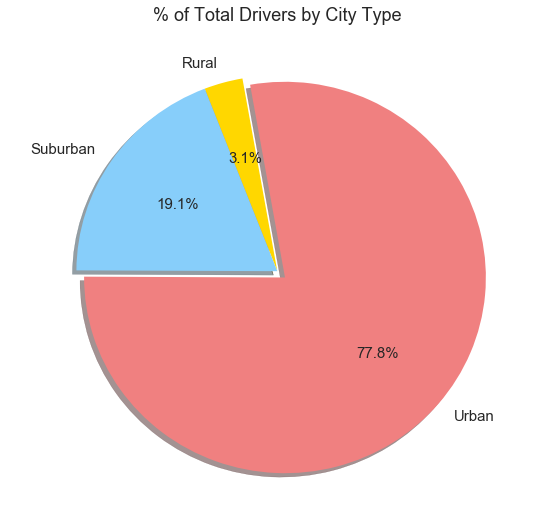

In [7]:
#total drivers by city type
city_type2 = city_df.groupby("type")
drivers_by_type = city_type2["driver_count"].sum()

#create pie chart 
colors = ["gold", "lightskyblue", "lightCoral"]
explode = [0, 0, 0.05]

drivers_by_type_chart = drivers_by_type.plot(kind="pie", colors=colors, 
                                       explode=explode, shadow=True, startangle=100,
                                       autopct="%1.1f%%", figsize=(9,9), fontsize=15,
                                       title="% of Total Drivers by City Type")
plt.axes().set_ylabel(" ")

plt.savefig("total_drivers.png")
plt.show()